<img src="../images/AzPTravel_PPM.png">
<img src='../images/papermill.png'>

# GPM Data Collection Pipeline Run Controller

### This file is both a user interface and an executable callable from other processes.

### To use:
   - Set your required variable values in the "Set Instance Parameters" Section.
   - You can then run the entire pipeline by running all cells or notebooks one at a time as you wish.

In [1]:

import os
from datetime import datetime
import time
import papermill as pm
from IPython.lib.pretty import pprint
import pandas as pd
import matplotlib.pyplot as plt

## Set Instance Parameters

In [2]:
commit = "Got something new it."
# give a reason for the run

percode = "2021.Q1"
# Data Collection Code, this controls file paths and output names

run_type = 1
#run_type =  0 - lite run with no reporting, not recommended.
#run_type =  1 - lite run with normal reporting, default setting.
#run_type =  2 - Heavy run with full reporting, available for audits and troubleshooting.

specialchars = "-Dev-forced"
# optional - add up to a 12 character code in order to mark your instance record .ipynb

## Source file format lookup

#### This is a list of file formats for each data collection.
- x : denotes that the source files are MS Excel documents.
- j : denotes the source files are json documents.
- p : denotes the source files are parquet documents.



In [3]:
if percode == "2019.Q4":
    s_format = "x"
elif percode == "2020.Q1":
    s_format = "x"
elif percode == "2020.Q3":
    s_format = "j"
elif percode == "2020.Q4":
    s_format = "j"
elif percode == "2021.Q1":
    s_format = "p"

## Record the datetimestamp for the instance

In [4]:
inst_datetime = datetime.now().strftime("%m%d%Y%H%M%S")
# a single datetime stamp for the full instance run

## set the instance archive folder

In [5]:
instances = f"//hecate/Insurance_US/Product Development/Product Management/"\
             f"Global PPM/Reporting/Data Collection/Production/{percode}/instances"

## style settings

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read the source files, append to create initial .csv.

In [7]:
nb = pm.execute_notebook( 'prep.ipynb', os.path.join( instances, f'prep{inst_datetime}-{specialchars}.ipynb' ),
                          {'run_control': run_type, 'percode': percode,
                           'commit_message': commit, 'inst_datetime' : inst_datetime, 'source_type' : s_format } )

### Output Summary

In [8]:
rt_path = f'//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/{str(percode)}'

prepfile = f"{percode}prep.csv"

prepcsv = os.path.join(str(rt_path), prepfile)

cols = ["Filename", "Size", "Last Modified" ]
file_info_df = pd.DataFrame(columns = cols)

name = f"{percode}prep.csv"
size = round((os.path.getsize(prepcsv) /1000000),1)  # size in MB
moddate = os.path.getctime(prepcsv)# time of last metadata change;
moddate =  datetime.fromtimestamp(moddate).strftime('%Y-%m-%d %H:%M:%S')# format change;
new_row = pd.DataFrame([[name, size, moddate]], columns = cols)
file_info_df = file_info_df.append(new_row, ignore_index=True)


%store -r prep_df

df = prep_df

df["Earned Revenues net of Taxes"] = df["Earned Revenues net of Taxes"].astype(float)

file_info_df

dfp = (df.pivot_table(index=( "Country", "Submission File"), columns=("Reporting Date From","Reporting Date To" ), values="Earned Revenues net of Taxes").fillna(0).astype(int))

dfp


,Filename,Size,Last Modified
0,2021.Q1prep.csv,9.1,2021-05-16 15:46:58


Reporting Date From                       2019-04-01 2021-01-01           
Reporting Date To                         2020-03-31 2020-03-31 2021-03-31
Country Submission File                                                   
AT      us_dat_nz+_05142021114427.parquet          0          0      64026
        us_dat_nz+_05162021153809.parquet          0          0      64026
AU      us_dat_nz+_05142021114427.parquet          0          0    2149386
        us_dat_nz+_05162021153809.parquet          0          0    2149386
BG      us_dat_nz+_05142021114427.parquet          0          0       6864
        us_dat_nz+_05162021153809.parquet          0          0       6864
CA      us_dat_nz+_05142021114427.parquet          0          0     264773
        us_dat_nz+_05162021153809.parquet          0          0     264773
CH      us_dat_nz+_05142021114427.parquet          0          0      24719
        us_dat_nz+_05162021153809.parquet          0          0      24719
CN      us_dat_nz+_05142021114427.parquet          0          0    1527912
        us_dat_nz+_05162021153809.parquet          0          0    1527912
CZ      us_dat_nz+_05142021114427.parquet          0          0    1195970
        us_dat_nz+_05162021153809.parquet          0          0    1195970
DE      us_dat_nz+_05142021114427.parquet          0          0    2986862
        us_dat_nz+_05162021153809.parquet          0          0    2986862
DK      us_dat_nz+_05142021114427.parquet          0          0      62014
        us_dat_nz+_05162021153809.parquet          0          0      62014
ES      us_dat_nz+_05142021114427.parquet          0          0      45747
        us_dat_nz+_05162021153809.parquet          0          0      45747
FOS     us_dat_nz+_05142021114427.parquet          0          0    4314303
        us_dat_nz+_05162021153809.parquet          0          0    4314303
FR      us_dat_nz+_05142021114427.parquet          0          0     301437
        us_dat_nz+_05162021153809.parquet          0          0     301437
GR      us_dat_nz+_05142021114427.parquet          0          0     297635
        us_dat_nz+_05162021153809.parquet          0          0     297635
HK      us_dat_nz+_05142021114427.parquet          0          0     203424
        us_dat_nz+_05162021153809.parquet          0          0     203424
HU      us_dat_nz+_05142021114427.parquet          0          0       1484
        us_dat_nz+_05162021153809.parquet          0          0       1484
IS      us_dat_nz+_05142021114427.parquet          0          0      57707
        us_dat_nz+_05162021153809.parquet          0          0      57707
IT      us_dat_nz+_05142021114427.parquet          0          0     692913
        us_dat_nz+_05162021153809.parquet          0          0     692913
NL      us_dat_nz+_05142021114427.parquet          0          0     245760
        us_dat_nz+_05162021153809.parquet          0          0     245760
NO      us_dat_nz+_05142021114427.parquet          0          0      98228
        us_dat_nz+_05162021153809.parquet          0          0      98228
NZ      us_dat_nz+_05142021114427.parquet          0          0     907751
        us_dat_nz+_05162021153809.parquet          0          0     907751
PL      us_dat_nz+_05142021114427.parquet          0          0     403324
        us_dat_nz+_05162021153809.parquet          0          0     403324
PT      us_dat_nz+_05142021114427.parquet          0          0      15974
        us_dat_nz+_05162021153809.parquet          0          0      15974
RO      us_dat_nz+_05142021114427.parquet          0          0      67883
        us_dat_nz+_05162021153809.parquet          0          0      67883
SC      us_dat_nz+_05142021114427.parquet          0          0     178229
        us_dat_nz+_05162021153809.parquet          0          0     178229
SE      us_dat_nz+_05142021114427.parquet          0          0     141809
        us_dat_nz+_05162021153809.parquet          0          0     141809
SG      us_dat_nz+_051420

## Read the prep file into the pipeline.

In [9]:
nb = pm.execute_notebook( 'read_dc.ipynb', os.path.join( instances, f'read_dc{inst_datetime}-{specialchars}.ipynb' ),
                          {'run_control': run_type, 'percode': percode,
                           'commit_message': commit, 'inst_datetime' : inst_datetime } )

### Output Summary

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Earned Revenue net of Taxes by BU in thousands LC')

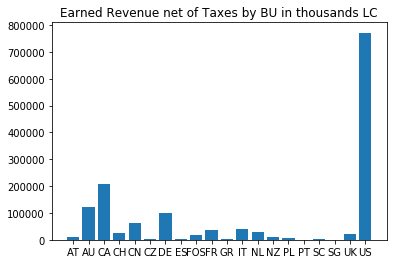

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Row Counts by BU')

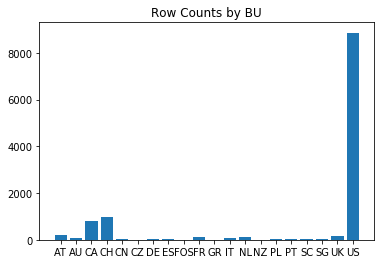

In [10]:
tempfile = f"{percode}.parquet"

prepcsv = os.path.join(str(rt_path), tempfile)

%store -r read_dc_df
df = read_dc_df

if run_type > 0:

    sumdata = df.groupby(['Business Unit']).sum()
    sumdata = sumdata.reset_index()
    plt.bar(sumdata['Business Unit'], sumdata['Earned Revenues net of Taxes']/1000)
    plt.title('Earned Revenue net of Taxes by BU in thousands LC')
    plt.show()

    countdata = df.groupby(['Business Unit']).count()
    countdata = countdata.reset_index()
    plt.bar(countdata['Business Unit'], countdata['Earned Revenues net of Taxes'])
    plt.title('Row Counts by BU')
    plt.show()

else:
    print("Charts Skipped")

## Read initial .csv, make transformations in python, output to {percode}.localcur.parquet

In [11]:
nb = pm.execute_notebook( 'py_transform.ipynb', os.path.join( instances, f'py_transform{inst_datetime}-{specialchars}.ipynb' ),
                          {'run_control': run_type, 'percode': percode,
                           'commit_message': commit, 'inst_datetime' : inst_datetime  } )

### Output Summary

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Earned Revenue net of Taxes by BU in thousands LC')

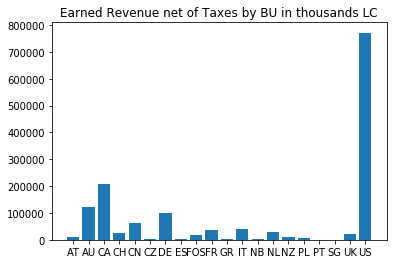

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Row Counts by BU')

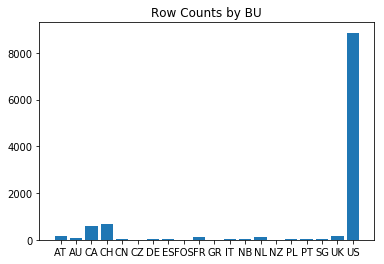

In [12]:
tempfile = f"{percode}.localcur.parquet"

prepcsv = os.path.join(str(rt_path), tempfile)

%store -r py_t_df
df = py_t_df


if run_type > 0:

    sumdata = df.groupby(['business_unit']).sum()
    sumdata = sumdata.reset_index()
    plt.bar(sumdata['business_unit'], sumdata['earned_revenues_net_of_taxes']/1000)
    plt.title('Earned Revenue net of Taxes by BU in thousands LC')
    plt.show()

    countdata = df.groupby(['business_unit']).count()
    countdata = countdata.reset_index()
    plt.bar(countdata['business_unit'], countdata['earned_revenues_net_of_taxes'])
    plt.title('Row Counts by BU')
    plt.show()

else:
    print("Charts Skipped")

## Read {percode}.localcur.parquet make transfomrations in r , output to {percode}.localcur.parquet

In [13]:
nb = pm.execute_notebook( 'r_transform.ipynb', os.path.join( instances, f'r_transform{inst_datetime}-{specialchars}.ipynb' ),
                          {'run_control': run_type, 'percode': percode,
                           'commit_message': commit, 'inst_datetime' : inst_datetime  } )

## Read {percode}.localcur.parquet, output to {percode}.localcur.csv, make Euro fx conversions, output to {percode}.euroconv.csv

In [14]:
nb = pm.execute_notebook( 'make_output.ipynb', os.path.join( instances, f'make_output{inst_datetime}-{specialchars}.ipynb' ),
                          {'run_control': run_type, 'percode': percode,
                           'commit_message': commit, 'inst_datetime' : inst_datetime  } )


In [15]:
lfile = f'//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/{str(percode)}\\{str(percode)}.localcur.csv'
efile =  f'//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/{str(percode)}\\{str(percode)}.euroconv.csv'

cols = ["Filename", "Size", "Last Modified" ]
file_info_df = pd.DataFrame(columns = cols)

name = f"{percode}localcur.csv"
size = round((os.path.getsize(lfile) /1000000),1)  # size in MB
moddate = os.path.getctime(lfile)# time of last metadata change;
moddate =  datetime.fromtimestamp(moddate).strftime('%Y-%m-%d %H:%M:%S')# format change;
new_row = pd.DataFrame([[name, size, moddate]], columns = cols)
l_file_info_df = file_info_df.append(new_row, ignore_index=True)

name = f"{percode}euroconv.csv"
size = round((os.path.getsize(efile) /1000000),1)  # size in MB
moddate = os.path.getctime(efile)# time of last metadata change;
moddate =  datetime.fromtimestamp(moddate).strftime('%Y-%m-%d %H:%M:%S')# format change;
new_row = pd.DataFrame([[name, size, moddate]], columns = cols)
e_file_info_df = file_info_df.append(new_row, ignore_index=True)


print("Pipeline has run successfully.")
l_file_info_df
e_file_info_df


Pipeline has run successfully.


,Filename,Size,Last Modified
0,2021.Q1localcur.csv,9.5,2021-04-27 15:07:53


,Filename,Size,Last Modified
0,2021.Q1euroconv.csv,11.4,2021-04-27 15:07:52
